# Demo 2 
## Mini Checkers Implementation With Learning Agents
<B> Zach Galante <b>

In [2]:
# installing the Game library and importing
!pip install "git+git://github.com/bblais/Game" --upgrade
from Game import * 
%matplotlib inline
from matplotlib.pylab import figure,plot,legend,xlabel,ylabel
from tqdm import tqdm 
import matplotlib.pyplot as plt
#import numpy as np
%pylab inline

  Cloning git://github.com/bblais/Game to /tmp/pip-req-build-5ye_b9up
  Created wheel for Game: filename=Game-0.2.32-py3-none-any.whl size=16079 sha256=a4101c297ee2be1a0e3da5670d087e60db2b94c2485395c2a48fd5991c91c555
  Stored in directory: /tmp/pip-ephem-wheel-cache-atf0pr5i/wheels/d0/41/69/b5bc095dce0369f48fd806d2a637ce96d9f9889ca7828dae1d
Successfully built Game
  Attempting uninstall: Game
    Found existing installation: Game 0.2.32
    Uninstalling Game-0.2.32:
      Successfully uninstalled Game-0.2.32
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'randint', 'draw', 'prod', 'copy', 'argmax']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [9]:
from Game import * 

Version:  0.2.32


# Game Functions

### Initial State
Here, there are two initial state functions, the first is used to simulate the game from the start. The second will be for the 'near end game' where there are only a few moves for each player until the game is over. This function was useful when testing the learning agents to make sure they run properly before having the game learn from the begining. 

<b> Important to only run the cell with the desired initial state function </b>

In [1]:
def initial_state():
    board = Board(6,6)
    player1_initial = [0,2,4,7,9,11]
    player2_initial = [30,32,34,25,27,29]
    for location1,location2 in zip(player1_initial, player2_initial):
        board[location1] = 1
        board[location2] = 2
    return board


In [65]:
#-------ENDGAME INITIAL STATE -----------------------
def initial_state():
    board = Board(6,6)
    board[11] = 2
    board[9] =2 
    board[1] =2 
    board[27] =1
    board[25] =1 
    board[7] = 2
    board[4] = 0
    board[2] = 2
    board[30] =1 
    board[32] = 1 
    board[34] = 0
    board[29] = 1
    board[19] = 1
    return board

## Show State

In [2]:
def show_state(state):
    print(state)

## Valid Moves

In [3]:
def valid_moves(state, player):
    valid_moves_list = []
    for location in range(36):
# player 1 valid moves
        if (player == 1) & (location <= 29) & (state[location] == 1):
            # right boarders, will only allow the correct move
            if location in [5,11,17,23,29]:
                valid_move1 = location + 5
                if state[valid_move1] == 0:
                    Valid_move = []
                    Valid_move.append(location)
                    Valid_move.append(valid_move1)
                    valid_moves_list.append(Valid_move)
                    # taking the opponent's piece
                elif state[valid_move1] == 2:
                    if (valid_move1 + 5 <= 35)  & (state[valid_move1 + 5] == 0):
                        Valid_move = []
                        Valid_move.append(location)
                        Valid_move.append(valid_move1 + 5)
                        valid_moves_list.append(Valid_move)
                        #valid_moves_dict[location] = valid_moves_list
                    
            elif location in [0,6,12,18,24]: # left boarders
                valid_move1 = location + 7
                if state[valid_move1] == 0:
                    Valid_move = []
                    Valid_move.append(location)
                    Valid_move.append(valid_move1)
                    valid_moves_list.append(Valid_move)
                    #valid_moves_dict[location] = valid_moves_list
                elif state[valid_move1] == 2:
                    if (valid_move1  +7 <= 35)  & (state[valid_move1 + 7] == 0):
                        Valid_move  = []
                        Valid_move.append(location)
                        Valid_move.append(valid_move1 + 7)
                        valid_moves_list.append(Valid_move)
                        #valid_moves_dict[location] = valid_moves_list
            else:
                
                if state[location + 5] == 0:
                    Valid_move = []
                    Valid_move.append(location)
                    Valid_move.append(location + 5)
                    valid_moves_list.append(Valid_move)
                elif state[location + 5] == 2: # if player 1 is on the spot, will check to see if you can jump
                    if (location + 10 <= 35)  & (state[location + 10] == 0):
                        Valid_move = []
                        Valid_move.append(location)
                        Valid_move.append(location  + 10)     
                        valid_moves_list.append(Valid_move)
                if state[location + 7] == 0:
                    Valid_move = []
                    Valid_move.append(location)
                    Valid_move.append(location  + 7)
                    valid_moves_list.append(Valid_move)
                elif state[location + 7 ] == 2: # if player 1 is on the spot, will check to see if you can jump
                    if (location + 14 <= 35)  & (state[location + 14] == 0):
                        Valid_move = []
                        Valid_move.appennd(location)
                        Valid_move.append(location  + 14)
                        valid_moves_list.append(Valid_move)
                #if len(valid_moves_list) > 0 :
                    #valid_moves_dict[location] = valid_moves_list
#----player 2 valid moves-----------------------------------------------------------
        elif (player == 2) & (location >= 6) & (state[location] == 2):
        # right boarders, will only allow the correct move
            if location in [5,11,17,23,29]:
                # gets the new location
                valid_move1 = location - 7
                if state[valid_move1] == 0:
                    Valid_move = []
                    Valid_move.append(location)
                    Valid_move.append(valid_move1)
                    valid_moves_list.append(Valid_move)
                elif state[valid_move1] == 1:
                    if (valid_move1 -7 > 0)  & (state[valid_move1 - 7] == 0):
                        Valid_move = []
                        Valid_move.append(location)
                        Valid_move.append(valid_move1 -7)
                        valid_moves_list.append(Valid_move)
                        #valid_moves_dict[location] = valid_moves_list
            # left boarders
            elif location in [0,6,12,18,24,30,35]:
                valid_move1 = location - 5
                if state[valid_move1] == 0:
                    Valid_move = []
                    Valid_move.append(location)
                    Valid_move.append(valid_move1)
                    valid_moves_list.append(Valid_move)
                    # taking the opponent's piece
                elif state[valid_move1] == 1:
                    if (valid_move1 -5 > 0)  & (state[valid_move1 - 5] == 0):
                        Valid_move = []
                        Valid_move.append(location)
                        Valid_move.append(valid_move1 - 5)
                        valid_moves_list.append(Valid_move)
            else:
                
                if state[location - 5] == 0:
                    Valid_move = []
                    Valid_move.append(location)
                    Valid_move.append(location - 5)
                    valid_moves_list.append(Valid_move)
                elif state[location - 5] == 1: # if player 1 is on the spot, will check to see if you can jump
                    if (location - 10 > 0)  & (state[location - 10] == 0):
                        Valid_move = []
                        Valid_move.append(location)
                        Valid_move.append(location -10)
                        valid_moves_list.append(Valid_move)
                if state[location - 7] == 0:
                    Valid_move = []
                    Valid_move.append(location)
                    Valid_move.append(location  - 7)
                    valid_moves_list.append(Valid_move)
                elif state[location - 7 ] == 1: # if player 1 is on the spot, will check to see if you can jump
                    if (location - 14 > 0)  & (state[location - 14] == 0):
                        Valid_move = []
                        Valid_move.append(location)
                        Valid_move.append(location  -14)
                        valid_moves_list.append(Valid_move)

    return valid_moves_list

## Update State 

In [4]:
def update_state(state, player, move):
    new_state = state
    start_location = move[0]
    end_location = move[1]
    new_state[end_location] = player
    new_state[start_location] = 0
    other_player_num = 3 - player
# updating for jumps 
    if end_location - start_location == 14:
        new_state[end_location - 7] = 0
    elif end_location - start_location == 10:
        new_state[end_location - 5] = 0
    elif end_location - start_location == -14:
         new_state[end_location + 7] = 0
    elif end_location - start_location == -10:
         new_state[end_location + 5] = 0
            
    return new_state

## Win Status

In [5]:
def win_status(state, player):
    other_player_num = 3 - player
    if not valid_moves(state,other_player_num):  
        return 'win'
    elif not valid_moves(state,player):
        return 'lose'
    else:
        return None

# Agents

## Random Move

In [6]:
def random_move(state, player):
    move  = random.choice(valid_moves(state,player))
    return move

## Human Move

In [7]:
def human_move(state,player):
    valid_moves_list = valid_moves(state,player)
    print(f'Valid Moves: {valid_moves_list}')
    start_location = int(input('Which piece would you like to move?'))
    end_location = int(input('Where would you like to move this piece?'))
    move = [start_location, end_location]
    return move

In [10]:
human_agent = Agent(human_move)
random_agent = Agent(random_move)
g= Game()
#g.run(human_agent, human_agent)
g.run(random_agent, random_agent)

====
Game  1
 1  0  1  0  1  0 
 0  1  0  1  0  1 
 0  0  0  0  0  0 
 0  0  0  0  0  0 
 0  2  0  2  0  2 
 2  0  2  0  2  0 

Player 1 moves [9, 16]
 1  0  1  0  1  0 
 0  1  0  0  0  1 
 0  0  0  0  1  0 
 0  0  0  0  0  0 
 0  2  0  2  0  2 
 2  0  2  0  2  0 

Player 2 moves [27, 22]
 1  0  1  0  1  0 
 0  1  0  0  0  1 
 0  0  0  0  1  0 
 0  0  0  0  2  0 
 0  2  0  0  0  2 
 2  0  2  0  2  0 

Player 1 moves [16, 21]
 1  0  1  0  1  0 
 0  1  0  0  0  1 
 0  0  0  0  0  0 
 0  0  0  1  2  0 
 0  2  0  0  0  2 
 2  0  2  0  2  0 

Player 2 moves [22, 15]
 1  0  1  0  1  0 
 0  1  0  0  0  1 
 0  0  0  2  0  0 
 0  0  0  1  0  0 
 0  2  0  0  0  2 
 2  0  2  0  2  0 

Player 1 moves [21, 26]
 1  0  1  0  1  0 
 0  1  0  0  0  1 
 0  0  0  2  0  0 
 0  0  0  0  0  0 
 0  2  1  0  0  2 
 2  0  2  0  2  0 

Player 2 moves [15, 10]
 1  0  1  0  1  0 
 0  1  0  0  2  1 
 0  0  0  0  0  0 
 0  0  0  0  0  0 
 0  2  1  0  0  2 
 2  0  2  0  2  0 

Player 1 moves [4, 9]
 1  0  1  0  0  0

[2]

## Q- Learning Agent

In [11]:
def Q_move(state,player,info):
    Q=info.Q
    last_state=info.last_state
    last_action=info.last_action
    learning=info.learning
    
    α=info.α  # learning rate
    ϵ=info.ϵ  # how often to take a random move
    γ=info.γ  # memory constant -- how quickly does the table update back in time (earlier in the game)
    
    # \alpha <hit tab>    α
    # \epsilon <hit tab>  ϵ
    # \gamma <hit tab>    γ
    
    if state not in Q:
        actions=valid_moves(state,player)
        Q[state]=Table()
        for action in actions:
            Q[state][action]=0  # initial value of table
    
    
    if random.random()<ϵ:  # take a random move occasionally to explore the environment
        move=random_move(state,player)
    else:
        move=top_choice(Q[state])
    
    if not last_action is None:  # not the first move
        reward=0
        
        # learn
        if learning:
            Q[last_state][last_action]+=α*(reward +
                        γ*max([Q[state][a] for a in Q[state]]) - Q[last_state][last_action])
    
    return move

In [12]:
def Q_after(status,player,info):
    Q=info.Q
    last_state=info.last_state
    last_action=info.last_action
    learning=info.learning
    
    α=info.α  # learning rate
    ϵ=info.ϵ  # how often to take a random move
    γ=info.γ  # memory constant -- how quickly does the table update back in time (earlier in the game)
    
    # \alpha <hit tab>    α
    # \epsilon <hit tab>  ϵ
    # \gamma <hit tab>    γ

    if status=='lose':
        reward=-1
    elif status=='win':
        reward=1
    elif status=='stalemate':
        reward=.5 # value stalemate a little closer to a win
    else:
        reward=0
    
    
    if learning:
        Q[last_state][last_action]+=α*(reward - Q[last_state][last_action])

### Implementation / Training

In [16]:
Q1_agent=Agent(Q_move)
Q1_agent.post=Q_after
#Q1_agent.Q=Table()  # makes an empty table
Q1_agent.learning=True

Q1_agent.α=0.3  # learning rate
Q1_agent.ϵ=0.1  # how often to take a random move
Q1_agent.γ=0.9  # memory constant -- how quickly does the table update back in time (earlier in the game)

In [17]:
Q2_agent=Agent(Q_move)
Q2_agent.post=Q_after
#Q2_agent.Q=Table()  # makes an empty table
Q2_agent.learning=True

Q2_agent.α=0.3  # learning rate
Q2_agent.ϵ=0.1  # how often to take a random move
Q2_agent.γ=0.9  # memory constant -- how quickly does the table update back in time (earlier in the game)

In [18]:
# Because this has already been trained, I can load the learned results back 
Q1_agent.Q = LoadTable("Q1 table.json")
Q2_agent.Q =LoadTable('Q2 table.json')

#### Training

In [15]:
from tqdm import tqdm 
N_train=5
N_test=100

percentage_player1_wins=[]
percentage_player2_wins=[]
percentage_ties=[]
total_number_of_games=[]

Q1_agent.Q=Table()  # makes an empty table
Q2_agent.Q=Table()  # makes an empty table


current_game_number=0

for i in tqdm(range(2000)):
    
    Q1_agent.learning=Q2_agent.learning=True
    g=Game(number_of_games=N_train)
    g.display=False
    g.run(Q1_agent,Q2_agent)

    current_game_number+=N_train
    
    
    Q1_agent.learning=Q2_agent.learning=False
    g=Game(number_of_games=N_test)
    g.display=False
    results=g.run(random_agent,Q2_agent)
    
    percentage_player1_wins.append(results.count(1))
    percentage_player2_wins.append(results.count(2))
    percentage_ties.append(results.count(0)) 
    total_number_of_games.append(current_game_number)

100%|██████████| 2000/2000 [2:14:02<00:00,  4.02s/it]  


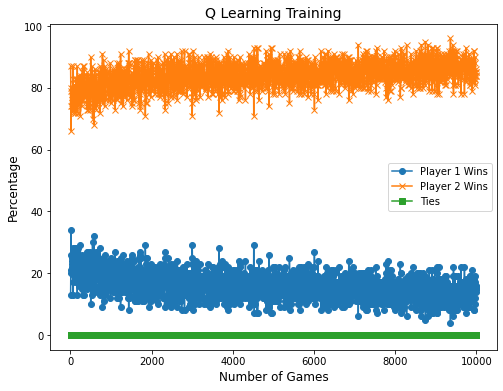

In [16]:
figure(figsize=(8,6))
plot(total_number_of_games,percentage_player1_wins,'-o',label="Player 1 Wins")
plot(total_number_of_games,percentage_player2_wins,'-x',label="Player 2 Wins")
plot(total_number_of_games,percentage_ties,'-s',label="Ties")
plt.title('Q Learning Training', size = 14)
xlabel('Number of Games', size = 12)
ylabel('Percentage', size = 12)
legend()

In [46]:
# Saving the results from the training, so that the agent doesn't need to be trained each time
#SaveTable(Q1_agent.Q,"Q1 table.json")
#SaveTable(Q2_agent.Q,"Q2 table.json")

### Q-Agent vs Human Agent

In this game, I played against the trained Q Agent. I ended up winning this game, but the Q Agent was one move away from winning it before me (Moving 13 to 7), showing that the agent was able to learn.  

In [81]:
g = Game()
g.run(human_agent,Q1_agent)

====
Game  1
 1  0  1  0  1  0 
 0  1  0  1  0  1 
 0  0  0  0  0  0 
 0  0  0  0  0  0 
 0  2  0  2  0  2 
 2  0  2  0  2  0 

Valid Moves: [[7, 12], [7, 14], [9, 14], [9, 16], [11, 16]]
Which piece would you like to move?7
Where would you like to move this piece?12
Player 1 moves [7, 12]
 1  0  1  0  1  0 
 0  0  0  1  0  1 
 1  0  0  0  0  0 
 0  0  0  0  0  0 
 0  2  0  2  0  2 
 2  0  2  0  2  0 

Player 2 moves [27, 20]
 1  0  1  0  1  0 
 0  0  0  1  0  1 
 1  0  0  0  0  0 
 0  0  2  0  0  0 
 0  2  0  0  0  2 
 2  0  2  0  2  0 

Valid Moves: [[0, 7], [2, 7], [9, 14], [9, 16], [11, 16], [12, 19]]
Which piece would you like to move?2
Where would you like to move this piece?7
Player 1 moves [2, 7]
 1  0  0  0  1  0 
 0  1  0  1  0  1 
 1  0  0  0  0  0 
 0  0  2  0  0  0 
 0  2  0  0  0  2 
 2  0  2  0  2  0 

Player 2 moves [25, 18]
 1  0  0  0  1  0 
 0  1  0  1  0  1 
 1  0  0  0  0  0 
 2  0  2  0  0  0 
 0  0  0  0  0  2 
 2  0  2  0  2  0 

Valid Moves: [[7, 14], [9, 14], 

Which piece would you like to move?21
Where would you like to move this piece?26
Player 1 moves [21, 26]
 0  2  0  2  0  2 
 0  0  2  0  0  0 
 1  0  0  0  0  0 
 0  1  2  0  0  0 
 0  2  1  0  1  0 
 0  0  0  1  0  1 

Player 2 moves [20, 15]
 0  2  0  2  0  2 
 0  0  2  0  0  0 
 1  0  0  2  0  0 
 0  1  0  0  0  0 
 0  2  1  0  1  0 
 0  0  0  1  0  1 

Valid Moves: [[19, 24], [26, 31]]
Which piece would you like to move?26
Where would you like to move this piece?31
Player 1 moves [26, 31]
 0  2  0  2  0  2 
 0  0  2  0  0  0 
 1  0  0  2  0  0 
 0  1  0  0  0  0 
 0  2  0  0  1  0 
 0  1  0  1  0  1 

Player 2 moves [15, 10]
 0  2  0  2  0  2 
 0  0  2  0  2  0 
 1  0  0  0  0  0 
 0  1  0  0  0  0 
 0  2  0  0  1  0 
 0  1  0  1  0  1 

Valid Moves: [[19, 24], [19, 26]]
Which piece would you like to move?19
Where would you like to move this piece?24
Player 1 moves [19, 24]
 0  2  0  2  0  2 
 0  0  2  0  2  0 
 1  0  0  0  0  0 
 0  0  0  0  0  0 
 1  2  0  0  1  0 
 0  1  0  1  0

[2]

## Minimax Agent
To train the minimax agent, it's performance against the trained Q learning agent was tracked with three different max depths, 5,6,7. This was to see if there would be an impact on it's overall performance in terms of winning the game in addition to the time to make a decision. The results of the experiment can be seen below.


<B> Max Depth: 5 </b>
* Lost the game 
* Had the fastest decision times

<B> Max Depth: 6 </b>
* Won the game
* Had decisison times slightly more than Max Depth 5, but much less than 7
* It's graph (shown below) also followed exponential decay the closest as well 

<B> Max Depth: 7 </b>
* Won the game
* Had decisison times extremely higher than Max Depth = 6


In [22]:
from Game.minimax import *
def minimax_move(state,player):

    values,moves=minimax_values(state,player,display=True, maxdepth = 6)
    return top_choice(moves,values)


minimax_agent=Agent(minimax_move)

In [23]:
player=1
state=initial_state()
minimax_values(state,player,display=True, maxdepth = 6)

  Choice Time: 3.057513952255249 seconds 


([0, 0, 0, 0, 0], [[11, 16], [9, 16], [9, 14], [7, 14], [7, 12]])

### **Minimax vs Q Learning Demo**

In [25]:
g.run(Q1_agent, minimax_agent)

====
Game  1
 1  0  1  0  1  0 
 0  1  0  1  0  1 
 0  0  0  0  0  0 
 0  0  0  0  0  0 
 0  2  0  2  0  2 
 2  0  2  0  2  0 

Player 1 moves [7, 12]
 1  0  1  0  1  0 
 0  0  0  1  0  1 
 1  0  0  0  0  0 
 0  0  0  0  0  0 
 0  2  0  2  0  2 
 2  0  2  0  2  0 

  Choice Time: 3.5379421710968018 seconds 
Player 2 moves [27, 20]
 1  0  1  0  1  0 
 0  0  0  1  0  1 
 1  0  0  0  0  0 
 0  0  2  0  0  0 
 0  2  0  0  0  2 
 2  0  2  0  2  0 

Player 1 moves [9, 16]
 1  0  1  0  1  0 
 0  0  0  0  0  1 
 1  0  0  0  1  0 
 0  0  2  0  0  0 
 0  2  0  0  0  2 
 2  0  2  0  2  0 

  Choice Time: 5.058074712753296 seconds 
Player 2 moves [32, 27]
 1  0  1  0  1  0 
 0  0  0  0  0  1 
 1  0  0  0  1  0 
 0  0  2  0  0  0 
 0  2  0  2  0  2 
 2  0  0  0  2  0 

Player 1 moves [16, 23]
 1  0  1  0  1  0 
 0  0  0  0  0  1 
 1  0  0  0  0  0 
 0  0  2  0  0  1 
 0  2  0  2  0  2 
 2  0  0  0  2  0 

  Choice Time: 4.316323280334473 seconds 
Player 2 moves [27, 22]
 1  0  1  0  1  0 
 0  0  0 

[2]

### Minimax Max Depth Results

In [21]:
move_times_depth7 = [10.358553409576416 , 12.645777225494385 , 18.790935039520264 , 29.284378051757812
                    ,33.54858899116516 , 33.78040790557861 , 19.179194688796997 , 14.792280197143555 ,
                    16.26939558982849 , 17.254592180252075 , 7.796169757843018 , 8.061596393585205 , 5.568469762802124,
                    4.053856611251831, 3.4879982471466064,  3.9546878337860107, 1.8431854248046875, 0.4930083751678467,
                    0.28641629219055176 , 0.10228657722473145, 0.012758970260620117 , 0.004525661468505859,
                    0.001016855239868164,0.08918595314025879, ]

In [26]:
move_times_depth6 = [3.5379421710968018, 5.058074712753296, 4.316323280334473, 3.8287558555603027, 4.805217027664185,
                    3.7035953998565674, 2.8413450717926025, 4.999976873397827, 6.859926223754883, 4.149718761444092, 2.5415284633636475,
                    3.407508611679077, 2.812894344329834, 2.251232862472534, 1.4531877040863037, 0.8711559772491455, 0.48448896408081055,
                    0.3023381233215332 , 0.11111140251159668, 0.02398824691772461,0.003504514694213867, 0.0005631446838378906]

In [73]:
move_times_depth5 = [1.7924938201904297, 1.7603187561035156, 2.375802516937256, 1.9021635055541992, 2.6293299198150635, 3.9250237941741943,
 3.6783273220062256, 3.6339051723480225, 2.2122387886047363, 1.9487802982330322, 2.410092830657959, 1.317697286605835,
 0.8365769386291504, 0.5143308639526367, 0.6018943786621094, 0.21775126457214355, 0.1318819522857666, 0.06172680854797363,
 0.02291083335876465, 0.004355430603027344, 0.0010209083557128906]

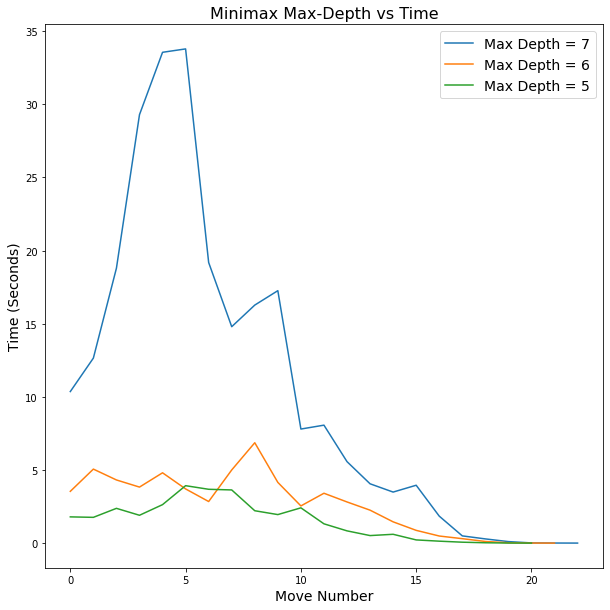

In [45]:
plt.figure(figsize = (10,10))
plt.title('Minimax Max-Depth vs Time', size = 16)
plt.xlabel('Move Number', size = 14)
plt.ylabel('Time (Seconds)', size = 14)
plt.plot(move_times_depth7,  label = 'Max Depth = 7')
plt.plot(move_times_depth6, label = 'Max Depth = 6')
plt.plot(move_times_depth5, label = 'Max Depth = 5')
plt.legend(fontsize = 14)

Text(0.5, 1.0, 'Depth = 7')

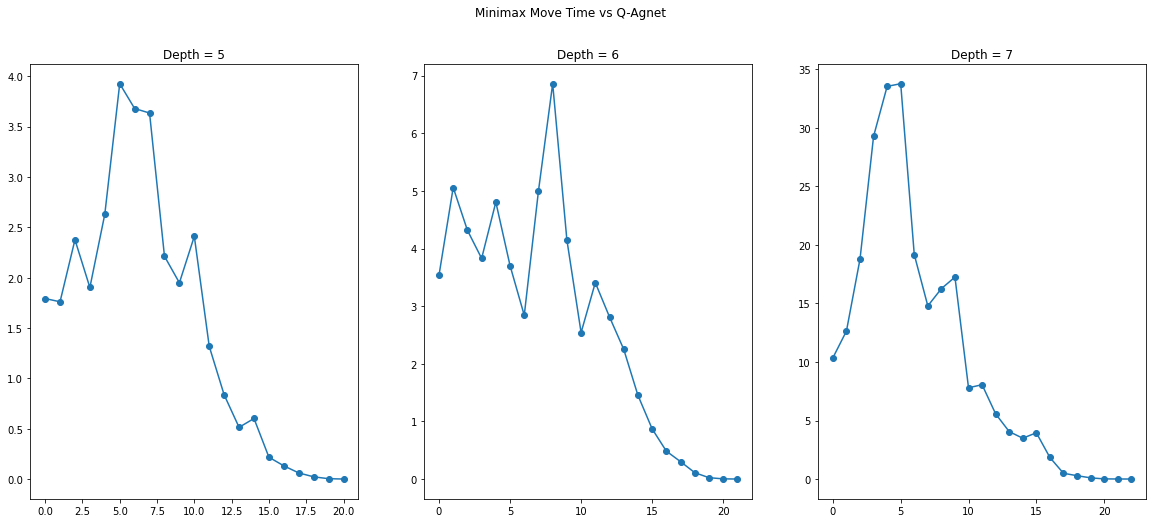

In [72]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Minimax Move Time vs Q-Agnet', size = 12)
axs[0].set_title('Depth = 5', size= 12)
axs[0].plot(move_times_depth5,'-o')
axs[1].plot(move_times_depth6,'-o')
axs[1].set_title('Depth = 6', fontsize= 12)
axs[2].plot(move_times_depth7, '-o')
axs[2].set_title('Depth = 7', fontsize= 12)

## Skittles Agent 

In [32]:
def skittles_move(state,player,info):
    T=info.T
    last_state=info.last_state
    last_action=info.last_action
    
    if state not in T:
        actions=valid_moves(state,player)
        T[state]=Table()
        for action in actions:
            T[state][action]=2  # initial number of skittles
    
    
    move=weighted_choice(T[state])
    
    if move is None:  
        
        # learn
        if last_state:
            T[last_state][last_action]-=1 # take away a skittle
            if T[last_state][last_action]<0:
                T[last_state][last_action]=0
    
        return random_move(state,player)
    else:
        return move

In [33]:
def skittles_after(status,player,info):
    # not return anything but...
    # will adjust the skittles table if lost the game
    T=info.T
    last_state=info.last_state
    last_action=info.last_action

    if status=='lose':  # only learn when you lose
        T[last_state][last_action]-=1 # take away a skittle
        if T[last_state][last_action]<0:
            T[last_state][last_action]=0

In [35]:
skittles_agent=Agent(skittles_move)
skittles_agent.post=skittles_after
skittles_agent.T=Table()  # makes an empty table

### Implementation

Next, the skittles agent is being trained against the random agent to learn which move to make given a certain state on the board. Due to the design of this learning algorithm, training takes an extremely long time.


In [ ]:
N_train=5
N_test=100

percentage_player1_wins=[]
percentage_player2_wins=[]
percentage_ties=[]
total_number_of_games=[]

skittles_agent.T=Table()  # makes an empty table


current_game_number=0

for i in tqdm(range(10000)):
    
    skittles_agent.learning=True
    g=Game(number_of_games=N_train)
    g.display=False
    g.run(random_agent,skittles_agent)

    current_game_number+=N_train
    
    
    skittles_agent.learning=False
    g=Game(number_of_games=N_test)
    g.display=False
    results=g.run(random_agent,skittles_agent)
    
    percentage_player1_wins.append(results.count(1))
    percentage_player2_wins.append(results.count(2))
    percentage_ties.append(results.count(0)) 
    total_number_of_games.append(current_game_number)

Running the code above to allow the agent to learn for 10,000 iterations takes approximetly 10 hours to completely run. Instead of running the learning agent each time, a graph of the results from 10,000 iterations previously trained is included below.

As shown by the graph, as the number of games increases, player 2 is begining to win more games. This is illistrating that the skittles agent is in fact learning, but at an extremely slow rate. This be seen by both the slight upward curve illistrating Player 2's Wins, and also be noticing the slight variation in the percentage of games won at the end of the graph compared to the begining.

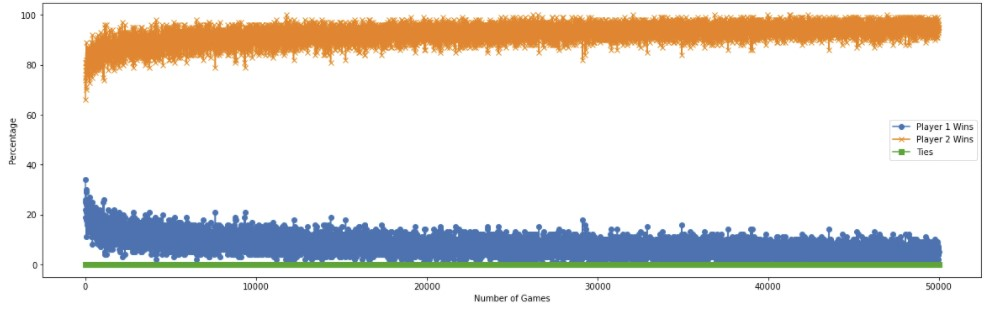